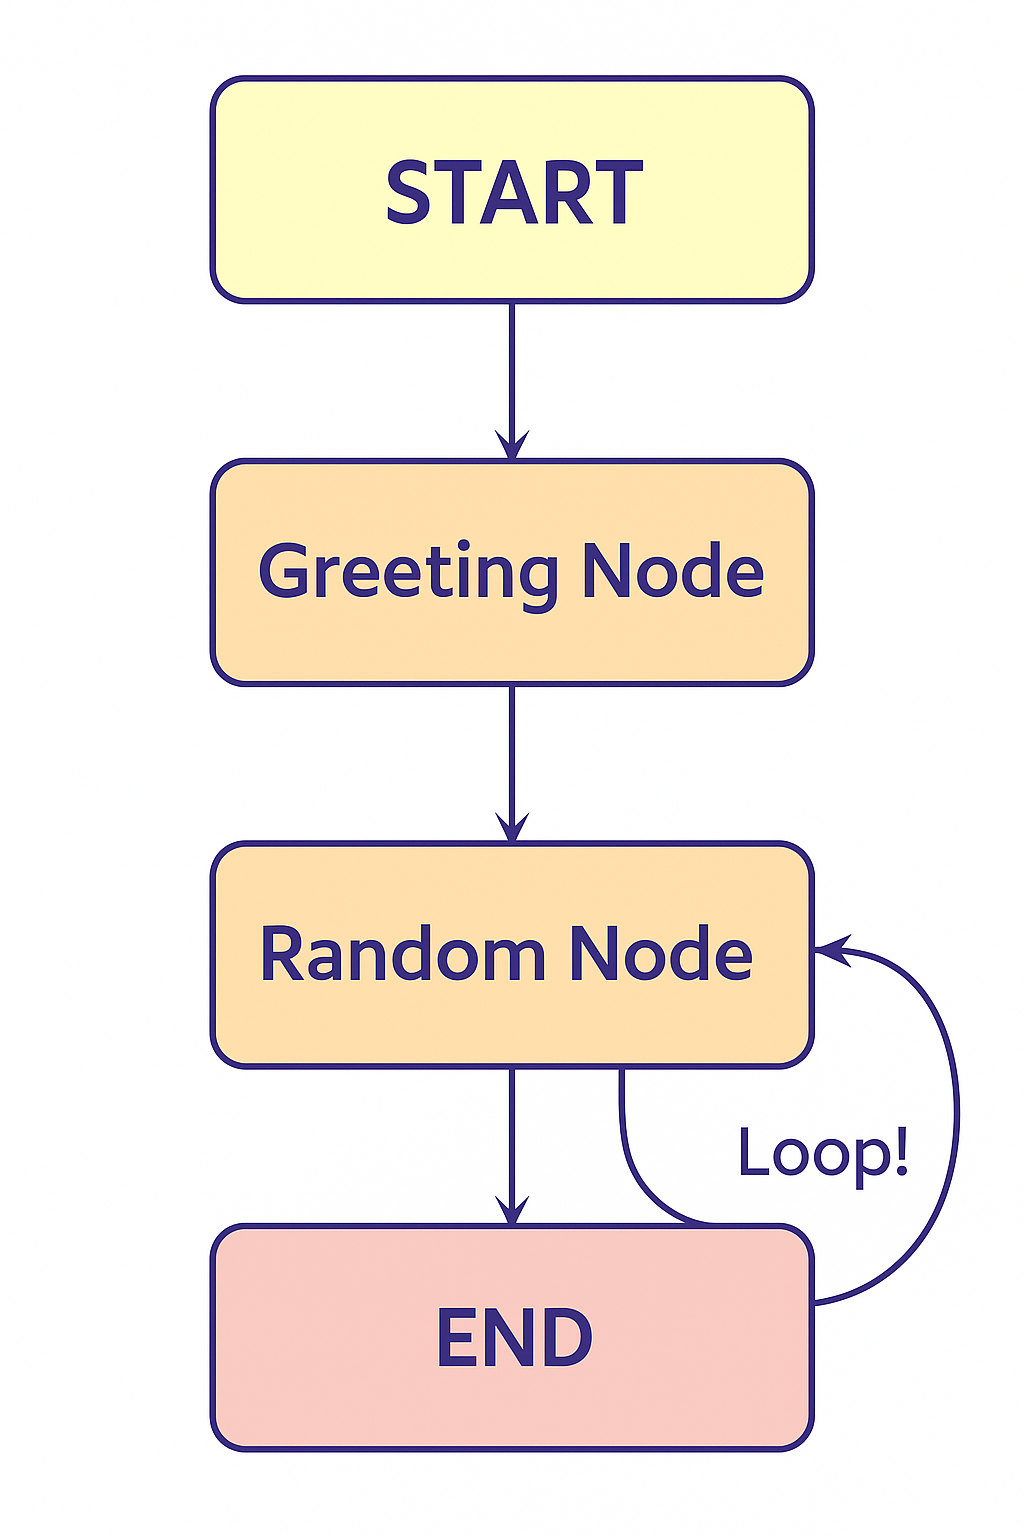

#Loops implementation

In [36]:
from typing import Dict,TypedDict,List #Annotations
from langgraph.graph import StateGraph,END

In [37]:
class AgentState(TypedDict):
    name:str
    number:List[int]
    counter:int

In [38]:
def greeting_node(state:AgentState) -> AgentState:
    "Greeting Node , to greet the Person"
    state["name"]=f"hello{state["name"]}"
    state["counter"] = 0

    return state
    


In [39]:
def random_node(state:AgentState) ->AgentState:
    "generate a random number between 10 to 100"
    state["number"].append(random.randint(10,100))
    return state


In [40]:
def should_continue(state:AgentState)->AgentState:
    """Function to decide what to do next"""
    if state["counter"] <5:
        print("Entered into the Loop",state["counter"])
    else:
        print("exit",state["counter"])
    

In [ ]:
graph=StateGraph(AgentState)

In [42]:
graph

In [43]:
graph.add_node("greeting",greeting_node)
graph.add_node("random",random_node)
graph.add_edge("greeting","random")


graph.add_conditional_edges(
    "random",      #Source
    should_continue, # Action
    {
        "loop":"random",
        "exit":END
    }
)


In [44]:
graph.set_entry_point("greeting")

In [45]:
apps=graph.compile()

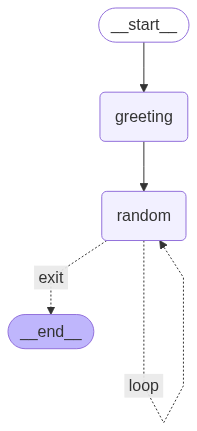

In [46]:
apps